# Coding Section
- Any given code is optional to help you; if you want to edit it, modify it, or implement your own, it's okay.

In [2]:
text = "This is me typing a random paragraph as part of the official training data for the ASCA solution. I hope that this makes me tons of money, and that I can patent it. Let us see what the future holds. One day I will be a millionaire and read this hilarious test data and have a good laugh. See you in 3 years."
print(len(text))

307


## Imports

In [1]:
from IPython.display import Audio
import numpy as np
import pandas as pd
import librosa

## Reading Data

[Text(0.5, 1.0, 'MFCC')]

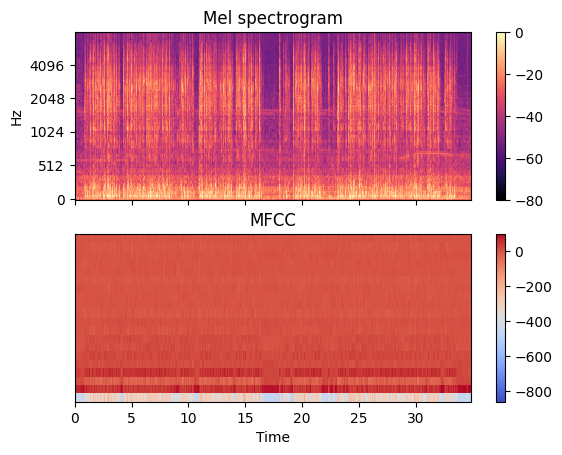

In [3]:
y, sr= librosa.load('qt_1746047498719_free_form.wav', sr=16000)
mfccs=librosa.feature.mfcc(y=y, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

### RMS (intensity), Pitch(Fundamental Frequency F0), Log power spectogram

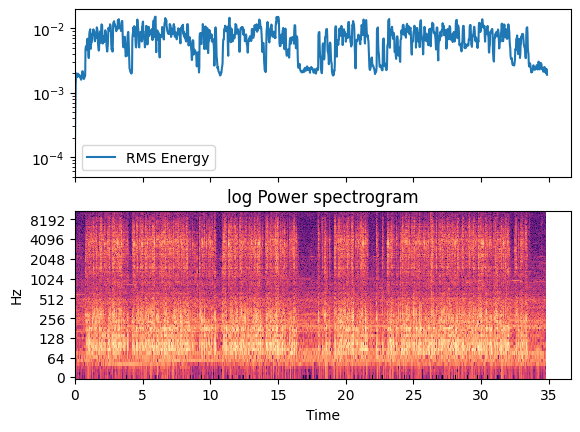

In [6]:
rms= librosa.feature.rms(y=y)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

the problem is to map between the double sequences, the audio and the text. the hidden layer and the observed layer

We have the Audio which is Hidden layer and MFCCs which is Observed features

In [4]:
# But now this is CTC problem to map between the double sequences without Time stamps.
# you gived me a CSV file contain the time staps to solve as HMM problem. we didn't train on this type "using CSV file". I will try
import pandas as pd

data=pd.read_csv("qt_1746047498719_time_stamps.csv")
data

,Session ID,Timestamp (ms),Event,Key,Phase
0,qt_session_1746047498719,1746047988988,press,Key.shift,Phase 2
1,qt_session_1746047498719,1746047989145,press,T,Phase 2
2,qt_session_1746047498719,1746047989258,release,Key.shift,Phase 2
3,qt_session_1746047498719,1746047989288,release,t,Phase 2
4,qt_session_1746047498719,1746047989385,press,h,Phase 2
...,...,...,...,...,...
625,qt_session_1746047498719,1746048033551,release,r,Phase 2
626,qt_session_1746047498719,1746048033627,press,s,Phase 2
627,qt_session_1746047498719,1746048033747,release,s,Phase 2
628,qt_session_1746047498719,1746048033881,press,.,Phase 2


## Isolation

In [ ]:
# what I understood about isolation is to use the dataframe to divide the audio to time stamps
# or map between the audio with time time staps to be HMM problem


In [ ]:
# this is a problem solving contest not a speech recognition quiz :D
# I should map between the inacurate time stamps and add boundaries because we work with melli seconds in the isolator function as Eng Osama said?
#

In [ ]:
# another reasoning:
# the CSV file contain the start time stamps for each event. we wanna start and end timestaps


In [10]:
# Here I will add my logic for Isolation function
data.values

array([['qt_session_1746047498719', 1746047988988, 'press', 'Key.shift',
        'Phase 2'],
       ['qt_session_1746047498719', 1746047989145, 'press', 'T',
        'Phase 2'],
       ['qt_session_1746047498719', 1746047989258, 'release',
        'Key.shift', 'Phase 2'],
       ...,
       ['qt_session_1746047498719', 1746048033747, 'release', 's',
        'Phase 2'],
       ['qt_session_1746047498719', 1746048033881, 'press', '.',
        'Phase 2'],
       ['qt_session_1746047498719', 1746048034009, 'release', '.',
        'Phase 2']], dtype=object)

it increase around 100 ms between events

In [14]:
dic = {
    "event":[],
    "start":[],
    "end":[]
}



In [18]:
dic.values()

dict_values([[], [], []])

In [ ]:
for i in range (len(data)):
  dic.append(data.Event, data["Timestamp (ms)"][i], data["Timestamp (ms)"][i+1]-100)


In [ ]:
def isolator():
    """
    Isolate individual strokes.

    Parameters:
    -----------


    Returns:
    --------
    strokes : list of torch.Tensor or numpy array or whatever datatype you use.
        A list of 1D tensors or arrays, each containing an isolated audio segment (stroke).
    """
    dic = {
    "event":[],
    "start":[],
    "end":[]
    }
    for i in range (len(data)):
      dic.append(data.Event, data["Timestamp (ms)"][i], data["Timestamp (ms)"][i+1]-100)


    return

In [ ]:
data = {
    "Label": [],
    "Signal": []
}

strokes = isolator()

# print(label, len(strokes)) or print(label, strokes.shape) # one of those two print lines should be work depend on your datatype return from isolation function.

for stroke in strokes:
    data["Label"].append(label)
    data["Signal"].append(stroke)

df = pd.DataFrame(data)
df

In [ ]:
# run this code so we can listen to at least three records after you isolate them to confirm it has only on stroke
Audio(audio_signal, rate=sr)

# HMM

HMM: Function: P(O|labda) to calculate: P(O|Q) which is tooo expensive with O(N^T) which if we have 15 char and 100 time staps it will be more than cells of the universe!!!! so we use Dynamic programming in forward algorithm


1- get the params N, T

2- Initialize Pi, A, mean, cov

3- neasted loop for time staps and inside it loop for each char:

    calculate forward

4- take the sum of all probabilities

In [ ]:
def extract_features():
    """
    Convert a single keystroke audio signal into a sequence of HMM observations.

    This function implicitly divides the input audio into multiple short,
    overlapping time frames and extracts acoustic features from each frame.
    Each frame corresponds to one observation in the HMM.

    Parameters
    ----------
    audio : numpy.ndarray
        1D array containing the waveform of a single isolated keystroke.
    sr : int
        Sampling rate of the audio signal.
    n_mfcc : int, optional
        Number of MFCC coefficients to extract per frame.

    Returns
    -------
    features : numpy.ndarray
        2D array of shape (T, D), where T is the number of time frames
        (observations) and D is the number of acoustic features per frame.
        Each row represents one HMM observation.
    """

    return

def quantize_features(all_features, n_clusters=10):
    """
    Fit KMeans to all feature vectors and quantize them to discrete indices
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(np.vstack(all_features))
    discrete_sequences = [kmeans.predict(feats).tolist() for feats in all_features]
    return discrete_sequences, kmeans

In [ ]:
def forward(pi, A, B, O):
    """
    Compute the forward algorithm for a discrete Hidden Markov Model.

    Parameters
    ----------
    pi : list or numpy array
        Initial probability distribution over states.
    A : list of lists or numpy array
        State transition probability matrix.
    B : list of lists or numpy array
        Emission probability matrix.
    O : list
        Observation sequence (list of observation indices).

    Returns
    -------
    alpha : list of lists
        The forward probability table.
    likelihood : float
        The total likelihood P(O | λ).
    """

    T=data["Timestamp (ms)"]
    N= len(data)

    # now we assume to have N, T.
    # and the funtion give me pi, A"transions prob matrix", B "emmition fun", O
    # we will start directly the forward which is to use DP and loop for each time stap, for each Q. apply the function, sum of all probabilities
    prob=[]
    for i in range(1,T):
      for j in range (N):
        #"the equation here with pi*b then b*o"


    # then take the sum of all probabilities.
    likelihood=sum(prob)

    pass


In [ ]:
# 1) Extract features
all_features = []
labels = []
for audio, sr, label in data:
    feats = extract_features(audio, sr)
    all_features.append(feats)
    labels.append(label)

# convert lists to numpy array and print their shapes, arr = np.array(list)

In [ ]:
# 2) Quantize features to discrete symbols
n_clusters = 5
X_seq, kmeans = quantize_features(all_features, n_clusters=n_clusters)

# 3) Define random HMM parameters
chars = sorted(set(labels))
N = len(chars)   # number of states
M = n_clusters   # number of discrete symbols

pi = np.ones(N) / N
A = np.ones((N, N)) / N
B = np.random.rand(N, M)
B /= B.sum(axis=1, keepdims=True)  # normalize

# 4) Run forward on first sequence
O = X_seq[0]  # first discrete sequence
alpha, likelihood = forward(pi, A, B, O)

print("Forward algorithm ran successfully!")

# Discussion

## Explain your isolation logic

the CSV file contain the start time for each event, we wanna the start and end time for each time stamps. there are blanks between each event. here is the problem.

CTC solves this problem by adding blanks between each event and time staps be needless.



My logic:

we have the start time, the end time for event 1 is the start time for event 2 -100 ms. it's not fully accurate but effective. if we need accurate results, simply use CTC :D

## What is main use of HMM?

to map between the double sequence (Audio and characters) as Hidden and observation layers WITH TIME STAPS. we can use CTC to map without inaccurate time staps using blanks.